<a href="https://colab.research.google.com/github/bs3537/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Bhav_submission2__DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd
import numpy as np

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [0]:
#inspecting the loaded data

cell_phones.head()



,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [0]:
cell_phones.shape

(9215, 3)

In [0]:
cell_phones.isna().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
population.shape

(59297, 3)

In [0]:
population.isna().sum()

geo                 0
time                0
population_total    0
dtype: int64

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
df = pd.merge(cell_phones, population, on=['geo', 'time'], how='inner')
df.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
df2 = pd.merge(df, geo_country_codes[['geo', 'country']])
df2.shape

(8590, 5)

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
df2.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


In [0]:
df3= df2.assign(cellphones_per_person=lambda df2: df2.cell_phones_total/df.population_total)

In [0]:
df3.head()

,geo,time,cell_phones_total,population_total,country,cellphones_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [0]:
mask_usa = df3['country'] == 'United States'
usa = df3[mask_usa]
usa.tail()


,geo,time,cell_phones_total,population_total,country,cellphones_per_person
8130,usa,2013,310698000.0,315536676,United States,0.984665
8131,usa,2014,355500000.0,317718779,United States,1.118914
8132,usa,2015,382307000.0,319929162,United States,1.194974
8133,usa,2016,395881000.0,322179605,United States,1.228759
8134,usa,2017,395881000.0,324459463,United States,1.220125


###The cell phones per person for USA in the dataframe in 2017 is 1.220 from the output above.

Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
df4 = df3.rename(columns = {'geo':'GEO'})
df4.head()

,GEO,time,cell_phones_total,population_total,country,cellphones_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [0]:
df4.tail()

,GEO,time,cell_phones_total,population_total,country,cellphones_per_person
8585,zwe,2013,13633167.0,15054506,Zimbabwe,0.905587
8586,zwe,2014,11798652.0,15411675,Zimbabwe,0.765566
8587,zwe,2015,12757410.0,15777451,Zimbabwe,0.808585
8588,zwe,2016,12878926.0,16150362,Zimbabwe,0.797439
8589,zwe,2017,14092104.0,16529904,Zimbabwe,0.852522


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
df4.describe()

,time,cell_phones_total,population_total,cellphones_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


###From the above output, the time period range is 1960 to 2017.

In [0]:
df4.describe(exclude='number')

,GEO,country
count,8590,8590
unique,195,195
top,lva,Trinidad and Tobago
freq,46,46


#### From the above output, the number of countries is 195.

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
df4.dtypes

GEO                       object
time                       int64
cell_phones_total        float64
population_total           int64
country                   object
cellphones_per_person    float64
dtype: object

In [0]:
df5 = df4['time'] == 2017
df6 = df4[df5]
df6.head()

,GEO,time,cell_phones_total,population_total,country,cellphones_per_person
45,afg,2017,23929713.0,35530081,Afghanistan,0.673506
91,ago,2017,13323952.0,29784193,Angola,0.447350
137,alb,2017,3497950.0,2930187,Albania,1.193763
183,and,2017,80337.0,76965,Andorra,1.043812
219,are,2017,19826224.0,9400145,United Arab Emirates,2.109140


In [0]:
df7 = df6.sort_values('cell_phones_total', ascending=False)
df7.head()



,GEO,time,cell_phones_total,population_total,country,cellphones_per_person
1496,chn,2017,1.474097e+09,1409517397,China,1.045817
3595,ind,2017,1.168902e+09,1339180127,India,0.872849
3549,idn,2017,4.589232e+08,263991379,Indonesia,1.738402
8134,usa,2017,3.958810e+08,324459463,United States,1.220125
1084,bra,2017,2.364885e+08,209288278,Brazil,1.129966


In [0]:
df8 = df7.drop(columns=['population_total','cellphones_per_person', 'time', 'GEO'])

df8.head()

,cell_phones_total,country
1496,1.474097e+09,China
3595,1.168902e+09,India
3549,4.589232e+08,Indonesia
8134,3.958810e+08,United States
1084,2.364885e+08,Brazil


### The above output gives the 5 top countries with the total number of cell phones arranged in descending order.

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [0]:
condition = (usa['cell_phones_total']) > (usa['population_total'])
columns = ['time','cell_phones_total', 'population_total']
subset = usa[condition][columns]
subset.head()

,time,cell_phones_total,population_total
8131,2014,355500000.0,317718779
8132,2015,382307000.0,319929162
8133,2016,395881000.0,322179605
8134,2017,395881000.0,324459463


### The above function returns all the years when USA had total cell phones more than the total population. From the output, the first year when the number of total cell phones exceeded the total population was 2014 in USA.

### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [0]:
df4.head()

,GEO,time,cell_phones_total,population_total,country,cellphones_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [0]:
df9 = df4.drop(columns=['GEO','population_total', 'cellphones_per_person'])
df9.head()

,time,cell_phones_total,country
0,1960,0.0,Afghanistan
1,1965,0.0,Afghanistan
2,1970,0.0,Afghanistan
3,1975,0.0,Afghanistan
4,1976,0.0,Afghanistan


In [0]:
df10 = df9.loc[df9.time.isin(['2007','2018', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])]

In [0]:
df10.head(10)

,time,cell_phones_total,country
35,2007,4668096.0,Afghanistan
37,2009,10500000.0,Afghanistan
38,2010,10215840.0,Afghanistan
39,2011,13797879.0,Afghanistan
40,2012,15340115.0,Afghanistan
41,2013,16807156.0,Afghanistan
42,2014,18407168.0,Afghanistan
43,2015,19709038.0,Afghanistan
44,2016,21602982.0,Afghanistan
45,2017,23929713.0,Afghanistan


In [0]:
df11 = df10.loc[df9.country.isin(['China','India', 'Indonesia', 'United States', 'Brazil'])]
df11.head()

,time,cell_phones_total,country
1074,2007,120980103.0,Brazil
1076,2009,169385584.0,Brazil
1077,2010,196929978.0,Brazil
1078,2011,234357507.0,Brazil
1079,2012,248323703.0,Brazil


In [0]:
pivot_table = df11.pivot_table(index='country', columns='time', values='cell_phones_total')
pivot_table.head()

time,2007,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,
Brazil,120980103.0,169385584.0,196929978.0,234357507.0,2.483237e+08,2.710998e+08,2.807288e+08,2.578143e+08,2.440674e+08,2.364885e+08
China,547306000.0,747214000.0,859003000.0,986253000.0,1.112155e+09,1.229113e+09,1.286093e+09,1.291984e+09,1.364934e+09,1.474097e+09
India,233620000.0,525090000.0,752190000.0,893862478.0,8.647209e+08,8.863042e+08,9.440087e+08,1.001056e+09,1.127809e+09,1.168902e+09
Indonesia,93386881.0,163676961.0,211290235.0,249805619.0,2.819637e+08,3.132269e+08,3.255828e+08,3.389483e+08,3.855734e+08,4.589232e+08
United States,249300000.0,274283000.0,285118000.0,297404000.0,3.048380e+08,3.106980e+08,3.555000e+08,3.823070e+08,3.958810e+08,3.958810e+08


In [0]:
pivot_table.shape

(5, 10)

###The pivot table seems to be right and is created as per the instructions. It has the years 2007-2017 as columns and the 5 countries mentioned above as rows. The shape function is counting 10 columns rather than 11 but it seems to be excluding the 'country' column which is now set as an index.

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [184]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [185]:
df.dtypes

Year                          int64
GoogleKnowlege_Occupation    object
Show                         object
Group                        object
Guest                        object
Occupation                   object
dtype: object

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [0]:
guests = pd.crosstab(df.Year, df.Occupation, normalize='index')*100

In [188]:
guests

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.361446,1.204819,6.626506,1.807229
2000,73.964497,8.284024,12.426036,5.325444
2001,72.611465,3.821656,19.745223,3.821656
2002,62.264151,6.918239,26.415094,4.402516
2003,56.024096,10.240964,24.698795,9.036145
2004,38.414634,22.560976,27.439024,11.585366
2005,37.037037,16.049383,33.333333,13.580247
2006,36.024845,19.254658,29.192547,15.527950
2007,25.531915,17.021277,33.333333,24.113475


### The crosstab output above is as intended with the values in percentages.

In [0]:
year = guests.index.tolist()

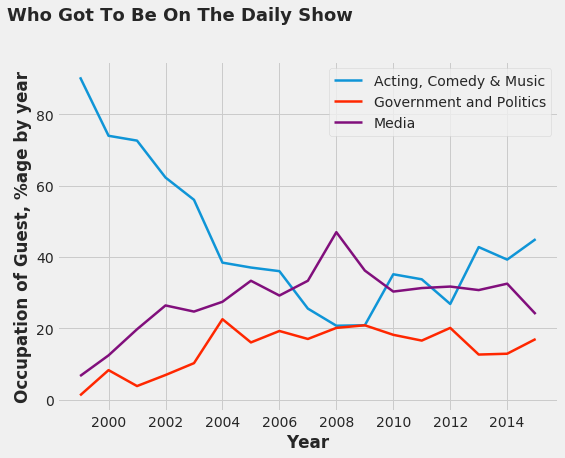

In [193]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,6))
ax1 = sns.lineplot(x=year, y=guests['Acting, Comedy & Music'].tolist(), color='#0F95D7', lw=2.5, label='Acting, Comedy & Music')
ax2 = sns.lineplot(x=year, y=guests['Government and Politics'].tolist(), color='#FF2700', lw=2.5, label='Government and Politics')
ax3 = sns.lineplot(x=year, y=guests['Media'].tolist(), color='#810F7C', lw=2.5, label='Media')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Occupation of Guest, %age by year', fontweight='bold')
plt.title('Who Got To Be On The Daily Show',
          fontsize=18,
          loc='left',
          x=-0.1,
          y=1.1,
          fontweight='bold')
plt.show();


### The output is as desired and very similar to the figure given below

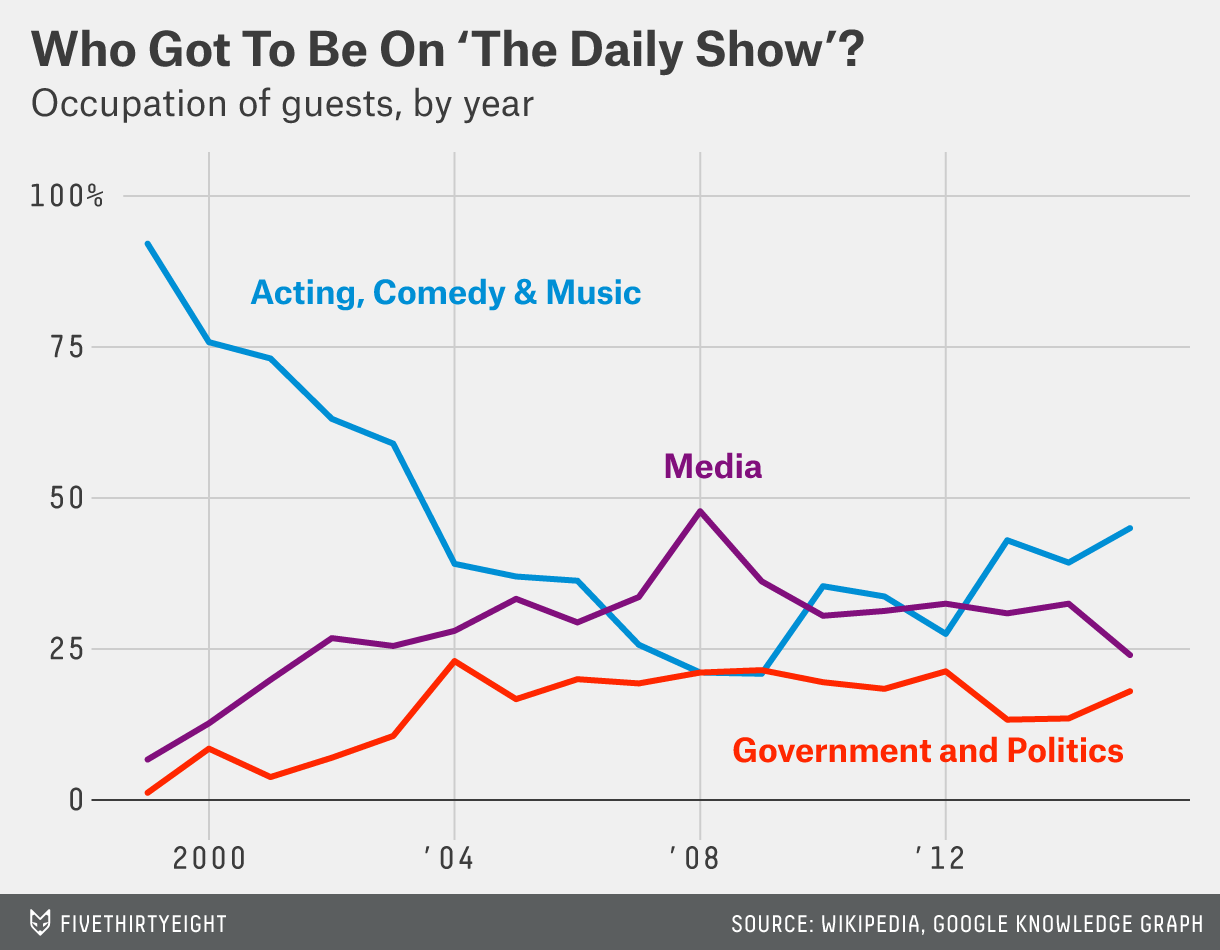

In [118]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.